In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid', palette = 'Set2')

In [2]:
df = pd.read_csv('clean_data.csv')

# Feature Selection

## Data Splitting

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df.drop(columns='year').describe().columns

Index(['adult_mortality', 'alcohol', 'hepatitis_b', '_bmi_', 'polio',
       'total_expenditure', 'diphtheria_', '_thinness__1-19_years',
       '_thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'life_expectancy_', 'infant_deaths', 'percentage_expenditure',
       'measles_', 'under-five_deaths_', '_hiv/aids', 'gdp', 'population'],
      dtype='object')

In [5]:
Xnum = df.loc[:, df.drop(columns='year').describe().columns]

Xnum.head()

,adult_mortality,alcohol,hepatitis_b,_bmi_,polio,total_expenditure,diphtheria_,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling,life_expectancy_,infant_deaths,percentage_expenditure,measles_,under-five_deaths_,_hiv/aids,gdp,population
0,263.0,0.01,65.0,19.1,41.0,8.16,65.0,16.6,16.85,0.479,10.1,65.0,62.0,71.279624,1154.0,83.0,0.1,584.259210,29913430.0
1,271.0,0.01,62.0,18.6,58.0,8.18,62.0,16.6,16.85,0.476,10.0,59.9,64.0,73.523582,492.0,86.0,0.1,612.696514,327582.0
2,268.0,0.01,64.0,18.1,62.0,8.13,64.0,16.6,16.85,0.470,9.9,59.9,66.0,73.219243,430.0,89.0,0.1,631.744976,29913430.0
3,272.0,0.01,67.0,17.6,67.0,8.52,67.0,16.6,16.85,0.463,9.8,59.5,69.0,78.184215,1998.0,93.0,0.1,669.959000,3696958.0
4,275.0,0.01,68.0,17.2,68.0,7.87,68.0,16.6,16.85,0.454,9.5,59.2,71.0,7.097109,1998.0,97.0,0.1,63.537231,2978599.0


<AxesSubplot:ylabel='count'>

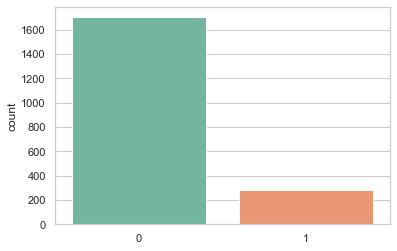

In [6]:
ynum = np.where(df.status == 'Developed', 1, 0)

sns.countplot(ynum)

# plt.savefig('unbalanced_target.png')

In [7]:
Xnum_train, Xnum_test, ynum_train, ynum_test = train_test_split(Xnum, ynum, test_size=0.2, random_state=10, stratify = ynum)

In [8]:
features = Xnum.columns

features

Index(['adult_mortality', 'alcohol', 'hepatitis_b', '_bmi_', 'polio',
       'total_expenditure', 'diphtheria_', '_thinness__1-19_years',
       '_thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'life_expectancy_', 'infant_deaths', 'percentage_expenditure',
       'measles_', 'under-five_deaths_', '_hiv/aids', 'gdp', 'population'],
      dtype='object')

## Selection

In [9]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import precision_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [10]:
Xnum_train.shape, Xnum_test.shape, ynum_train.shape, ynum_test.shape

((1589, 19), (398, 19), (1589,), (398,))

In [11]:
kfold = StratifiedKFold(n_splits=5)

for i in [0.001, 0.01, 0.1, 1, 1.5,  2, 3] :

    print(f'\nC : {i}\n')

    selector = Pipeline([
        ('scaler', StandardScaler()),
        # ('balancer', NearMiss()),
        ('selector', SelectFromModel(LogisticRegression(C=i, penalty = 'l1', solver='liblinear', random_state = 10)))
    ])

    selector.fit(Xnum_train, ynum_train)

    print(f'Numerical Feature Terpilih: {np.sum(selector.steps[1][1].get_support())}')
    print(f'{list(Xnum_train.columns[selector.steps[1][1].get_support()])}\n')

    print(f'Numerical Feature Terseleksi: {np.sum(~selector.steps[1][1].get_support())}')
    print(f'{list(Xnum_train.columns[~selector.steps[1][1].get_support()])}\n')

    
    # Evaluasi :

    estimator = Pipeline([
        ('scaler', StandardScaler()),
        # ('balancer', NearMiss()),
        ('model', LogisticRegression(C=i, penalty = 'l1', solver='liblinear', random_state=10))
    ])

    model_cv = cross_val_score(estimator, Xnum_train, ynum_train, cv=kfold, scoring = 'precision')

    print(f'Score (mean) : {round(model_cv.mean(), 2)}')
    print('Score (std) : {}\n\n' .format(round(model_cv.std(), 2)))


C : 0.001

Numerical Feature Terpilih: 0
[]

Numerical Feature Terseleksi: 19
['adult_mortality', 'alcohol', 'hepatitis_b', '_bmi_', 'polio', 'total_expenditure', 'diphtheria_', '_thinness__1-19_years', '_thinness_5-9_years', 'income_composition_of_resources', 'schooling', 'life_expectancy_', 'infant_deaths', 'percentage_expenditure', 'measles_', 'under-five_deaths_', '_hiv/aids', 'gdp', 'population']

Score (mean) : 0.0
Score (std) : 0.0



C : 0.01

Numerical Feature Terpilih: 4
['alcohol', 'schooling', 'life_expectancy_', 'percentage_expenditure']

Numerical Feature Terseleksi: 15
['adult_mortality', 'hepatitis_b', '_bmi_', 'polio', 'total_expenditure', 'diphtheria_', '_thinness__1-19_years', '_thinness_5-9_years', 'income_composition_of_resources', 'infant_deaths', 'measles_', 'under-five_deaths_', '_hiv/aids', 'gdp', 'population']

Score (mean) : 0.81
Score (std) : 0.04



C : 0.1

Numerical Feature Terpilih: 9
['adult_mortality', 'alcohol', 'hepatitis_b', 'total_expenditure', 'i

In [12]:
estimator = Pipeline([
    ('scaler', StandardScaler()),
    # ('balancer', NearMiss()),
    ('model', LogisticRegression(C=0.01, penalty = 'l1', solver='liblinear', random_state=10))
])

estimator.fit(Xnum_train, ynum_train)

ynum_pred = estimator.predict(Xnum_test)

print(classification_report(ynum_test, ynum_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       341
           1       0.81      0.51      0.62        57

    accuracy                           0.91       398
   macro avg       0.86      0.74      0.79       398
weighted avg       0.91      0.91      0.90       398



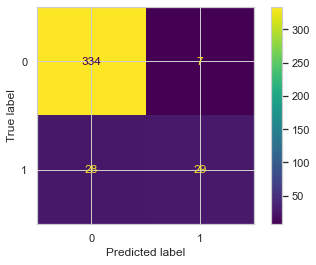

In [13]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(ynum_test, ynum_pred), display_labels=estimator.steps[1][1].classes_).plot()

# plt.savefig('lasso_confusion_matrix.png')

In [14]:
(round(pd.DataFrame(estimator.steps[1][1].coef_[0], index = features, columns = ['coef']).sort_values(by='coef'), 4) * 100)

,coef
adult_mortality,0.00
_hiv/aids,0.00
under-five_deaths_,0.00
measles_,0.00
infant_deaths,0.00
gdp,0.00
_thinness_5-9_years,0.00
income_composition_of_resources,0.00
diphtheria_,0.00
total_expenditure,0.00


<AxesSubplot:>

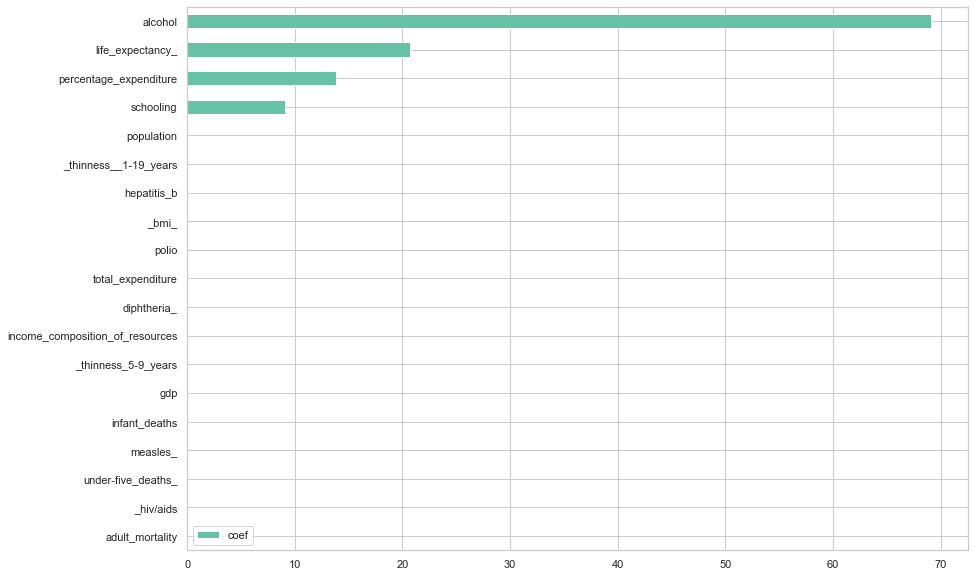

In [15]:
(round(pd.DataFrame(estimator.steps[1][1].coef_[0], index = features, columns = ['coef']).sort_values(by='coef'), 4) * 100).plot(kind='barh', figsize = (14,10))

# plt.savefig('lasso_coef.png')

In [16]:
selected_features = list(Xnum.columns[pd.DataFrame(estimator.steps[1][1].coef_[0], index=features, columns=['coef'])['coef'] !=0])

selected_features

['alcohol', 'schooling', 'life_expectancy_', 'percentage_expenditure']

# Model Evaluation

## Data Splitting

In [17]:
X = df.loc[:, ['country', 'year'] + selected_features]

X.columns

Index(['country', 'year', 'alcohol', 'schooling', 'life_expectancy_',
       'percentage_expenditure'],
      dtype='object')

<AxesSubplot:ylabel='count'>

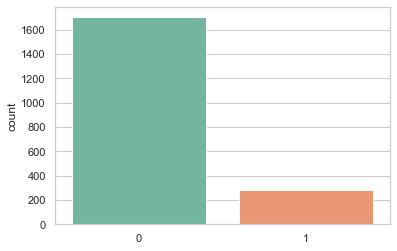

In [18]:
y = ynum

sns.countplot(y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify = y)

## Preprocessing

In [20]:
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [21]:
transformer = ColumnTransformer([
    ('binary', ce.BinaryEncoder(), ['country']),
], remainder='passthrough')

transformer.fit_transform(X_train)

features =transformer.get_feature_names()

In [22]:
pd.DataFrame(transformer.fit_transform(X_train), columns=features).head()

,binary__country_0,binary__country_1,binary__country_2,binary__country_3,binary__country_4,binary__country_5,binary__country_6,binary__country_7,binary__country_8,year,alcohol,schooling,life_expectancy_,percentage_expenditure
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2007.0,1.72,12.9,74.4,8.906931
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2005.0,7.72,12.4,65.0,353.243803
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,11.02,13.9,81.4,1795.070826
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2005.0,2.77,12.7,71.0,440.602704
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2007.0,4.14,10.3,65.1,49.936982


In [23]:
estimator = Pipeline([
    ('preprocess', transformer),
    ('scaler', StandardScaler()),
    ('balancer', NearMiss()),
    ('model', LogisticRegression())
])

model_cv = cross_val_score(estimator, X_train, y_train, cv=5, scoring='precision')

model_cv = abs(model_cv)
print('Score : ', np.sqrt(model_cv)),
print('Score (mean) : ', round(np.sqrt(model_cv).mean(), 2))
print('Score (std) : {}\n' .format(round(np.sqrt(model_cv).std(), 2)))

Score :  [0.86874449 0.89235436 0.90935311 0.89871703 0.94408916]
Score (mean) :  0.9
Score (std) : 0.02



In [24]:
estimator = Pipeline([
    ('preprocess', transformer),
    ('scaler', StandardScaler()),
    ('balancer', NearMiss()),
    ('model', LogisticRegression(solver='liblinear', random_state=10))
])

estimator.fit(X_train, y_train)

y_pred = estimator.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       341
           1       0.82      0.95      0.88        57

    accuracy                           0.96       398
   macro avg       0.90      0.96      0.93       398
weighted avg       0.97      0.96      0.96       398



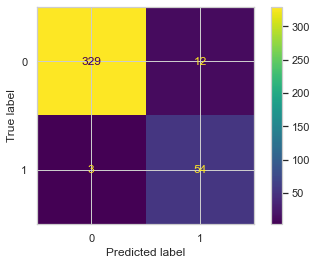

In [25]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=estimator.steps[3][1].classes_).plot()

# plt.savefig('class_confusion_matrix.png')

In [26]:
round(pd.DataFrame(estimator.steps[3][1].coef_[0], index = features, columns = ['coef']).sort_values(by='coef'), 4)

,coef
binary__country_4,-0.8109
year,-0.3274
binary__country_2,-0.0434
percentage_expenditure,-0.0400
binary__country_0,0.0000
binary__country_7,0.0758
binary__country_5,0.1762
binary__country_6,0.2362
binary__country_8,0.4129
binary__country_3,0.9048


<AxesSubplot:>

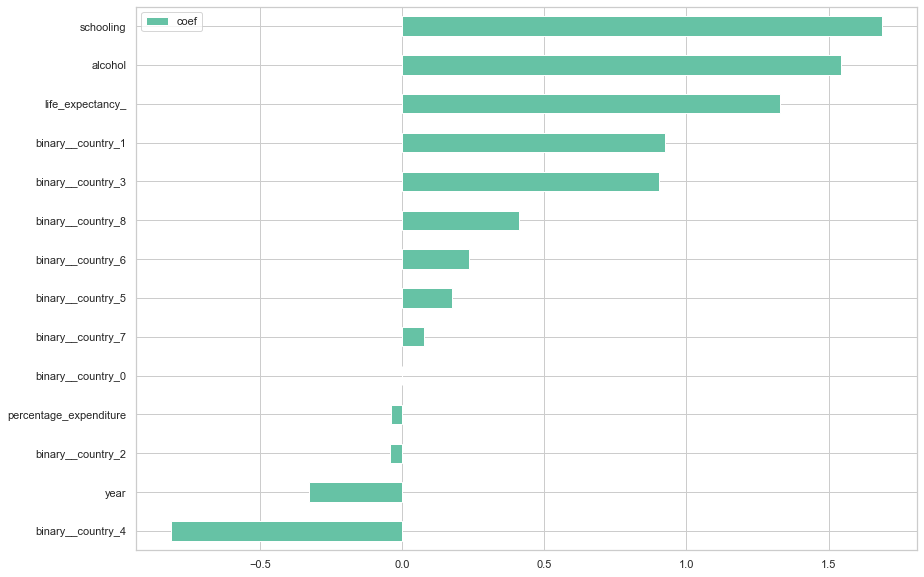

In [27]:
pd.DataFrame(estimator.steps[3][1].coef_[0], index = features, columns = ['coef']).sort_values(by='coef').plot(kind='barh', figsize = (14,10))

# plt.savefig('class_coef.png')

# SAVING MODEL : CLASSIFICATION

In [28]:
import pickle

In [29]:
estimator.fit(X, y)

pickle.dump(estimator, open('classification_model.sav', 'wb'))

# TESTING

In [30]:
log_model = pd.read_pickle(r'classification_model.sav')

In [31]:
X.columns

Index(['country', 'year', 'alcohol', 'schooling', 'life_expectancy_',
       'percentage_expenditure'],
      dtype='object')

In [32]:
test = pd.DataFrame({
    'country' : ['Germany'],
    'year' : [2016],
    'alcohol' : [12],
    'schooling' : [19],
    'life_expectancy_' : [90],
    'percentage_expenditure' : [100]
    })

In [33]:
log_model.predict(test)

array([1])

In [34]:
round(log_model.predict_proba(test)[0][1] * 100, 1)

98.8